 # 조찬형

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

##### 슬라이드 7

Text(0.5, 1.0, 'Income-Credit Graph')

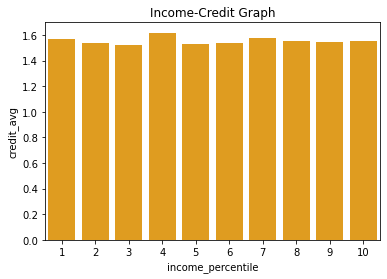

In [3]:
credit = pd.read_csv('credit_train_ver_3.csv')
credit.loc[credit['car'] == 'Y', 'car'] = 1
credit.loc[credit['car'] == 'N', 'car'] = 0

sns.barplot(data = credit , x = 'income_percentile', y = 'credit_avg' , 
            ci = False, color = 'orange')
plt.title('Income-Credit Graph')

##### 슬라이드 8

Text(0.5, 1.0, 'Probability of owning house VS Income Percentile')

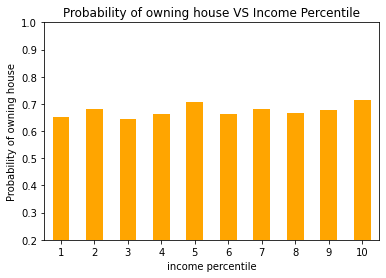

In [5]:
credit.loc[credit['reality'] == 'Y', 'reality'] = 1
credit.loc[credit['reality'] == 'N', 'reality'] = 0
credit.groupby('income_percentile')['reality'].mean().plot(kind = 'bar', color ='orange')
plt.ylim(0.2, 1)
plt.xticks(rotation=0)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning house')
plt.title('Probability of owning house VS Income Percentile')

##### 슬라이드 9

Text(0.5, 1.0, 'Probability of owning car VS Income Percentile')

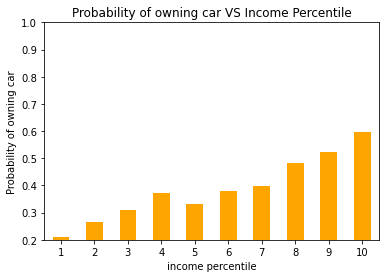

In [4]:
credit.loc[credit['car'] == 'Y', 'car'] = 1
credit.loc[credit['car'] == 'N', 'car'] = 0
credit.groupby('income_percentile')['car'].mean().plot(kind = 'bar',color ='orange')
plt.ylim(0.2, 1)
plt.xticks(rotation=0)
plt.xlabel('income percentile')
plt.ylabel('Probability of owning car')
plt.title('Probability of owning car VS Income Percentile')

# 송규원

In [1]:
# 디렉토리 설정
import os

os.chdir('C:\\Users\\rbden\\OneDrive\\바탕 화면\\Univ\\R & Python\\Python\\Pythondata')

os.getcwd()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_train_ver_3.csv')

df.head()

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit_avg,child_num_group
0,ID-0,5,0,0,0,0,202500.0,Commercial associate,Higher education,Married,...,4709,0,0,0,Commercial_associate_etc,2,7,3,1.600000,0
1,ID-1,9,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,1540,0,0,1,Laborers,3,8,4,0.555556,1
2,ID-2,6,1,1,1,0,450000.0,Working,Higher education,Married,...,4434,0,1,0,Managers,2,10,4,1.833333,0
3,ID-3,2,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,2092,0,1,0,Sales staff,2,7,3,1.000000,0
4,ID-4,1,0,1,1,0,157500.0,State servant,Higher education,Married,...,2105,0,0,0,Managers,2,5,2,2.000000,0


In [3]:
idx = list(df.columns.values).index('DAYS_EMPLOYED')

df.insert(idx + 1 , 'START_EMPLOYED' , df['DAYS_BIRTH'] - df['DAYS_EMPLOYED'])

df

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit_avg,child_num_group
0,ID-0,5,0,0,0,0,202500.0,Commercial associate,Higher education,Married,...,9190,0,0,0,Commercial_associate_etc,2,7,3,1.600000,0
1,ID-1,9,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,9840,0,0,1,Laborers,3,8,4,0.555556,1
2,ID-2,6,1,1,1,0,450000.0,Working,Higher education,Married,...,14653,0,1,0,Managers,2,10,4,1.833333,0
3,ID-3,2,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,12996,0,1,0,Sales staff,2,7,3,1.000000,0
4,ID-4,1,0,1,1,0,157500.0,State servant,Higher education,Married,...,12932,0,0,0,Managers,2,5,2,2.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,ID-8754,1,0,0,0,0,225000.0,Commercial associate,Secondary / secondary special,Single / not married,...,9757,0,1,0,Laborers,1,8,3,2.000000,0
8755,ID-8755,1,0,0,1,1,180000.0,Working,Higher education,Separated,...,12816,0,0,0,Working_etc,2,6,3,2.000000,1
8756,ID-8756,1,0,1,0,0,292500.0,Working,Secondary / secondary special,Civil marriage,...,8067,0,0,0,Core staff,2,9,4,2.000000,0
8757,ID-8757,1,1,0,1,0,171000.0,Working,Incomplete higher,Single / not married,...,10038,0,0,0,Laborers,1,6,3,2.000000,0


In [6]:
idx = list(df.columns.values).index('income_percentile')

df.drop(['income_percentile' , 'income_quantile'] , axis = 1 , inplace = True)

df.insert(idx , 'income_5_qt' , np.where(df['income_total'] <= q_2 , '1st' , 
                                          np.where(df['income_total'] <= q_4 , '2nd' , 
                                                  np.where(df['income_total'] <= q_6 , '3rd' , 
                                                          np.where(df['income_total'] <= q_8 , '4th' , '5th')))))

df.head()

,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
0,ID-0,5,0,0,0,0,202500.0,Commercial associate,Higher education,Married,...,4709,9190,0,0,0,Commercial_associate_etc,2,4th,1.600000,0
1,ID-1,9,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,1540,9840,0,0,1,Laborers,3,5th,0.555556,1
2,ID-2,6,1,1,1,0,450000.0,Working,Higher education,Married,...,4434,14653,0,1,0,Managers,2,5th,1.833333,0
3,ID-3,2,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,2092,12996,0,1,0,Sales staff,2,4th,1.000000,0
4,ID-4,1,0,1,1,0,157500.0,State servant,Higher education,Married,...,2105,12932,0,0,0,Managers,2,3rd,2.000000,0


##### 슬라이드 13

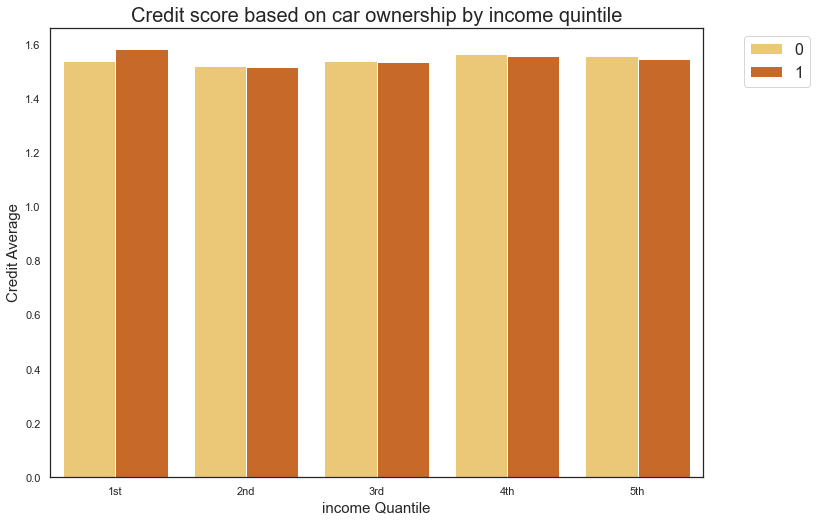

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df.sort_values('income_5_qt') , x = 'income_5_qt' , y = 'credit_avg' , hue = 'car' , 
             alpha = 0.3 , ci = False)

plt.legend(fontsize = 16 , bbox_to_anchor=(1.05, 1))
ax.set_title('Credit score based on car ownership by income quintile' , size = 20 )
ax.set_xlabel('income Quantile' , size = 15)
ax.set_ylabel('Credit Average' , size = 15)

plt.show()

##### 슬라이드 14

Text(0, 0.5, '# of Credit Card')

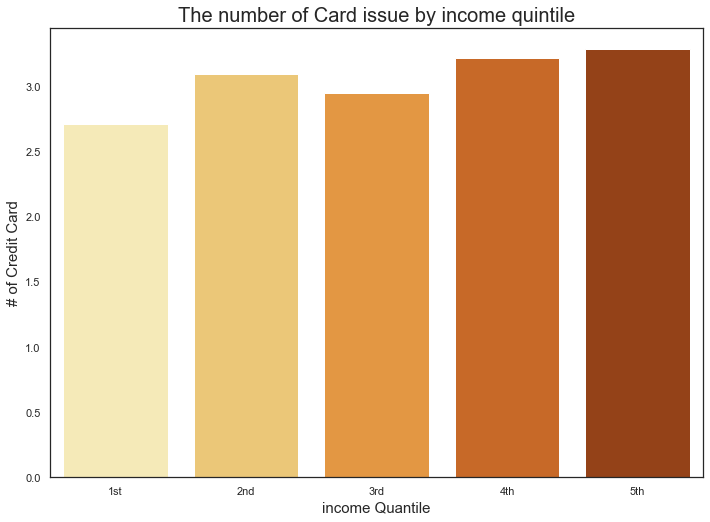

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df.sort_values('income_5_qt') , x = 'income_5_qt' , y = 'Counts' ,
             palette = 'YlOrBr' , ci = False)

ax.set_title('The number of Card issue by income quintile' , size = 20 )
ax.set_xlabel('income Quantile' , size = 15)
ax.set_ylabel('# of Credit Card' , size = 15)

# P.16

In [11]:
idx = list(df.columns.values).index('Counts')

df_1 = df[df['income_5_qt'] == '1st']

df_1.insert(idx + 1 , 'Counts_group' , np.where(df_1['Counts'] < mean_1st , 'Under' , 'Upper'))

df_1.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
9,ID-9,6,Upper,0,0,1,0,103500.0,Working,Secondary / secondary special,...,1308,14477,0,0,0,Medicine staff,2,1st,2.000000,0
28,ID-28,1,Under,1,1,0,0,112500.0,Commercial associate,Secondary / secondary special,...,2325,19786,1,1,0,Drivers,2,1st,2.000000,0
39,ID-39,5,Upper,1,1,1,2,112500.0,Working,Secondary / secondary special,...,1600,11422,0,0,0,Laborers,4,1st,2.000000,2
40,ID-40,3,Upper,1,1,1,0,90900.0,Working,Secondary / secondary special,...,2426,19274,0,0,0,Laborers,2,1st,1.333333,0
41,ID-41,5,Upper,0,0,1,2,99000.0,Commercial associate,Higher education,...,433,12319,0,1,0,Accountants,4,1st,2.000000,2


In [12]:
idx = list(df.columns.values).index('Counts')

df_2 = df[df['income_5_qt'] == '2nd']

df_2.insert(idx + 1 , 'Counts_group' , np.where(df_2['Counts'] < mean_2nd , 'Under' , 'Upper'))

df_2.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
11,ID-11,6,Upper,1,1,1,1,135000.0,Commercial associate,Higher education,...,91,11668,0,0,0,Managers,3,2nd,1.833333,1
13,ID-13,4,Upper,0,0,0,0,135000.0,Working,Higher education,...,2474,7413,0,1,0,Sales staff,2,2nd,2.000000,0
26,ID-26,5,Upper,1,1,0,1,135000.0,Working,Higher education,...,3353,14490,1,0,0,Laborers,3,2nd,2.000000,1
29,ID-29,5,Upper,0,0,1,0,121500.0,Commercial associate,Secondary / secondary special,...,1711,10306,0,1,0,Sales staff,2,2nd,0.600000,0
31,ID-31,2,Under,1,1,1,0,135000.0,Commercial associate,Higher education,...,3452,8310,1,0,1,Laborers,2,2nd,0.000000,0


In [13]:
idx = list(df.columns.values).index('Counts')

df_3 = df[df['income_5_qt'] == '3rd']

df_3.insert(idx + 1 , 'Counts_group' , np.where(df_3['Counts'] < mean_3rd , 'Under' , 'Upper'))

df_3.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
4,ID-4,1,Under,0,1,1,0,157500.0,State servant,Higher education,...,2105,12932,0,0,0,Managers,2,3rd,2.0,0
8,ID-8,5,Upper,1,1,1,1,180000.0,Commercial associate,Higher education,...,1466,13665,0,0,1,Commercial_associate_etc,3,3rd,1.6,1
12,ID-12,5,Upper,0,1,1,1,157500.0,Commercial associate,Secondary / secondary special,...,2162,9776,0,0,0,Accountants,3,3rd,0.4,1
14,ID-14,3,Upper,0,0,1,0,157500.0,Pensioner,Secondary / secondary special,...,0,22922,0,1,0,Retirement,1,3rd,2.0,0
15,ID-15,4,Upper,1,1,1,2,157500.0,Working,Secondary / secondary special,...,4056,8803,0,1,0,Drivers,4,3rd,1.0,2


In [14]:
idx = list(df.columns.values).index('Counts')

df_4 = df[df['income_5_qt'] == '4th']

df_4.insert(idx + 1 , 'Counts_group' , np.where(df_4['Counts'] < mean_4th , 'Under' , 'Upper'))

df_4.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
0,ID-0,5,Upper,0,0,0,0,202500.0,Commercial associate,Higher education,...,4709,9190,0,0,0,Commercial_associate_etc,2,4th,1.6,0
3,ID-3,2,Under,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,...,2092,12996,0,1,0,Sales staff,2,4th,1.0,0
10,ID-10,4,Upper,0,0,1,0,193500.0,Working,Secondary / secondary special,...,2213,16850,1,1,1,Laborers,1,4th,2.0,0
18,ID-18,3,Under,0,0,1,0,216000.0,Pensioner,Secondary / secondary special,...,0,23113,0,0,0,Retirement,2,4th,2.0,0
23,ID-23,4,Upper,1,1,0,0,225000.0,Working,Secondary / secondary special,...,444,14098,1,1,1,Working_etc,2,4th,1.5,0


In [15]:
idx = list(df.columns.values).index('Counts')

df_5 = df[df['income_5_qt'] == '5th']

df_5.insert(idx + 1 , 'Counts_group' , np.where(df_5['Counts'] < mean_5th , 'Under' , 'Upper'))

df_5.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
1,ID-1,9,Upper,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,...,1540,9840,0,0,1,Laborers,3,5th,0.555556,1
2,ID-2,6,Upper,1,1,1,0,450000.0,Working,Higher education,...,4434,14653,0,1,0,Managers,2,5th,1.833333,0
5,ID-5,1,Under,0,0,1,2,270000.0,Working,Secondary / secondary special,...,4996,8417,0,0,1,High skill tech staff,4,5th,1.000000,2
6,ID-6,5,Upper,0,0,0,0,315000.0,Working,Secondary / secondary special,...,1978,15592,0,0,1,Core staff,1,5th,2.000000,0
7,ID-7,2,Under,1,0,1,0,270000.0,Commercial associate,Secondary / secondary special,...,5420,9476,0,0,1,Drivers,2,5th,0.000000,0


In [16]:
df = pd.concat([df_1 , df_2 , df_3 , df_4 , df_5])

df = df.sort_index()

df.head()

,ID,Counts,Counts_group,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,START_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_5_qt,credit_avg,child_num_group
0,ID-0,5,Upper,0,0,0,0,202500.0,Commercial associate,Higher education,...,4709,9190,0,0,0,Commercial_associate_etc,2,4th,1.600000,0
1,ID-1,9,Upper,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,...,1540,9840,0,0,1,Laborers,3,5th,0.555556,1
2,ID-2,6,Upper,1,1,1,0,450000.0,Working,Higher education,...,4434,14653,0,1,0,Managers,2,5th,1.833333,0
3,ID-3,2,Under,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,...,2092,12996,0,1,0,Sales staff,2,4th,1.000000,0
4,ID-4,1,Under,0,1,1,0,157500.0,State servant,Higher education,...,2105,12932,0,0,0,Managers,2,3rd,2.000000,0


##### 슬라이드 16

Text(0, 0.5, 'Credit Average')

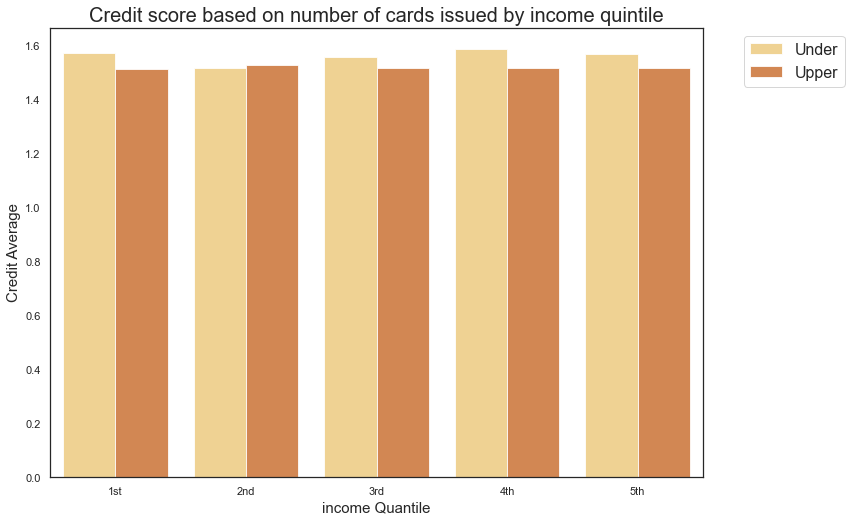

In [58]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

ax = sns.barplot(data = df.sort_values('income_5_qt') , x = 'income_5_qt' , y = 'credit_avg' , hue = 'Counts_group'  ,
              alpha = 0.8 , palette = 'YlOrBr' , ci = False)

plt.legend(fontsize = 16 , bbox_to_anchor=(1.05, 1))
ax.set_title('Credit score based on number of cards issued by income quintile' , size = 20 )
ax.set_xlabel('income Quantile' , size = 15)
ax.set_ylabel('Credit Average' , size = 15)

# 강건우

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
Train=pd.read_csv('C:\\Users\\ADMIN\\Downloads\\data_ID.csv')
Train

,Unnamed: 0,ID,Counts,gender,car,reality,child_num,income_total,income_type,edu_type,...,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,income_percentile,income_quantile,credit_avg,child_num_group
0,0,ID-0,5,0.0,0.0,0.0,0,202500.0,Commercial associate,Higher education,...,4709,0,0,0,Commercial_associate_etc,2,7.0,3.0,1.600000,0.0
1,1,ID-1,9,0.0,0.0,1.0,1,247500.0,Commercial associate,Secondary / secondary special,...,1540,0,0,1,Laborers,3,8.0,4.0,0.555556,1.0
2,2,ID-2,6,1.0,1.0,1.0,0,450000.0,Working,Higher education,...,4434,0,1,0,Managers,2,10.0,4.0,1.833333,0.0
3,3,ID-3,2,0.0,0.0,1.0,0,202500.0,Commercial associate,Secondary / secondary special,...,2092,0,1,0,Sales staff,2,7.0,3.0,1.000000,0.0
4,4,ID-4,1,0.0,1.0,1.0,0,157500.0,State servant,Higher education,...,2105,0,0,0,Managers,2,5.0,2.0,2.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,8754,ID-8754,1,0.0,0.0,0.0,0,225000.0,Commercial associate,Secondary / secondary special,...,581,0,1,0,Laborers,1,8.0,3.0,2.000000,0.0
8755,8755,ID-8755,1,0.0,0.0,1.0,1,180000.0,Working,Higher education,...,2475,0,0,0,Working_etc,2,6.0,3.0,2.000000,1.0
8756,8756,ID-8756,1,0.0,1.0,0.0,0,292500.0,Working,Secondary / secondary special,...,2015,0,0,0,Core staff,2,9.0,4.0,2.000000,0.0
8757,8757,ID-8757,1,1.0,0.0,1.0,0,171000.0,Working,Incomplete higher,...,107,0,0,0,Laborers,1,6.0,3.0,2.000000,0.0


In [6]:
Train1=Train[['income_type','income_total','credit_avg']]
Train2=Train1.sort_values(ascending=False,by='income_total').tail(1314)
Train2

,income_type,income_total,credit_avg
8262,State servant,99000.0,0.0
8267,State servant,99000.0,2.0
6169,Working,99000.0,2.0
5680,Working,99000.0,2.0
6199,Working,99000.0,1.5
...,...,...,...
1046,Pensioner,31500.0,2.0
2546,Pensioner,30150.0,2.0
396,Pensioner,29250.0,0.8
5991,Working,27000.0,1.0


In [15]:
condition=(Train2['income_type']=='State servant')
condition1=(Train2['income_type']=='Working')
condition2=(Train2['income_type']=='Commercial associate')
condition3=(Train2['income_type']=='Pensioner')
Train3=Train2.loc[condition]
Train4=Train2.loc[condition1]
Train5=Train2.loc[condition2]
Train6=Train2.loc[condition3]
print(Train3.mean())
print(Train4.mean())
print(Train5.mean())
print(Train6.mean())


income_total    77293.820225
credit_avg          1.534381
dtype: float64
income_total    79054.898400
credit_avg          1.537801
dtype: float64
income_total    81123.248408
credit_avg          1.589392
dtype: float64
income_total    74482.009029
credit_avg          1.563481
dtype: float64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23008\3425302822.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Train3.mean())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23008\3425302822.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Train4.mean())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23008\3425302822.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Train5.mean())
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23008\3425302822.py:12: FutureWarning: Dro

##### 슬라이드 17

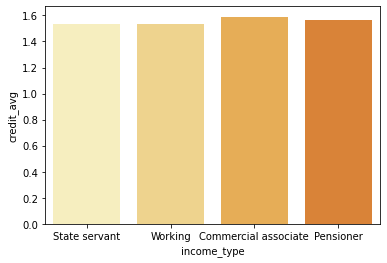

In [57]:
sns.set_palette("YlOrBr")
sns.barplot(data = Train2, x = 'income_type', y = 'credit_avg', ci=False, order = ['State servant', 'Working', 'Commercial associate','Pensioner'])
plt.show()

# 도승범

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
data_ID = pd.read_csv("C:/Users/sec/Desktop/DSL/data_ID.csv")
print(data_ID.head())
print(len(data_ID))
print(data_ID.columns)

   Unnamed: 0    ID  Counts   age  age_group  gender  car  reality  child_num  \
0           0  ID-0       5  38.0       30.0     0.0  0.0      0.0          0   
1           1  ID-1       9  31.0       30.0     0.0  0.0      1.0          1   
2           2  ID-2       6  52.0       50.0     1.0  1.0      1.0          0   
3           3  ID-3       2  41.0       40.0     0.0  0.0      1.0          0   
4           4  ID-4       1  41.0       40.0     0.0  1.0      1.0          0   

   income_total  ... work_phone phone email                occyp_type  \
0      202500.0  ...          0     0     0  Commercial_associate_etc   
1      247500.0  ...          0     0     1                  Laborers   
2      450000.0  ...          0     1     0                  Managers   
3      202500.0  ...          0     1     0               Sales staff   
4      157500.0  ...          0     0     0                  Managers   

   family_size  income_percentile  income_quantile  income_group5  credit_

# 저소득분위 내 자동차 보유 여부에 따른 연령 히스토그램

In [3]:
data_a = data_ID[data_ID['income_group5']<3]
data_b = data_a[data_a['car']==1]
len(data_a)
len(data_b)

1018

In [4]:
data_a.loc[data_a['car'] == 1, 'car'] = 'Y'
data_a.loc[data_a['car'] == 0, 'car'] = 'N'

C:\Users\sec\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


##### 슬라이드 20

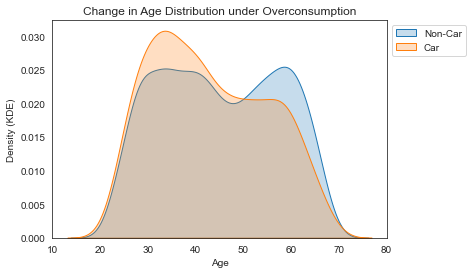

In [22]:
plt.title('Change in Age Distribution under Overconsumption')
sns.kdeplot(data_a['age'], shade = True, label = 'Non-Car')
sns.kdeplot(data_b['age'], shade = True, label = 'Car')
plt.xlabel('Age')
plt.ylabel('Density (KDE)')
plt.legend(labels = ['Non-Car', 'Car'],loc = 2, bbox_to_anchor = (1,1))
plt.show()

# 저소득분위 내 자동차 소유 여부에 따른 남녀 성비

## 데이터 재점검

In [7]:
data_a.loc[data_a['gender'] == 1, 'Gender'] = 'Male'
data_a.loc[data_a['gender'] == 0, 'Gender'] = 'Female'
print(data_a['Gender'])
df = data_a.groupby('car')['Gender'].value_counts(normalize = True)
print(df)

9       Female
11        Male
13      Female
26        Male
28        Male
         ...  
8749      Male
8750      Male
8751    Female
8752    Female
8758    Female
Name: Gender, Length: 3809, dtype: object
car  Gender
N    Female    0.838409
     Male      0.161591
Y    Female    0.543222
     Male      0.456778
Name: Gender, dtype: float64


C:\Users\sec\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sec\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\sec\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

##### 슬라이드 20

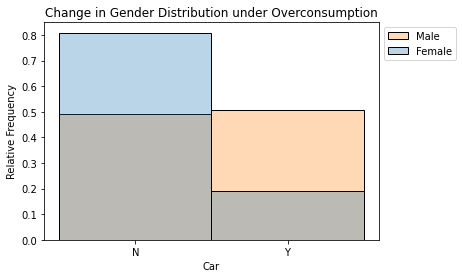

In [9]:
sns.histplot(x = 'car', data = data_a, hue = 'Gender', stat = 'probability', common_norm=False, fill = True, alpha = 0.3)
plt.title('Change in Gender Distribution under Overconsumption')
plt.xlabel('Car')
plt.ylabel('Relative Frequency')
plt.legend(labels = ['Male','Female'],loc = 2, bbox_to_anchor = (1,1))
plt.show()

## 소득 감소에 따른 자동차 보유 감소의 성별 간 차이

##### 슬라이드 21

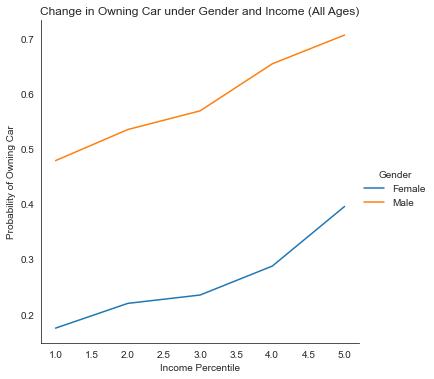

In [12]:
data_ID.loc[data_ID['gender'] == 1, 'Gender'] = 'Male'
data_ID.loc[data_ID['gender'] == 0, 'Gender'] = 'Female'
df = data_ID.groupby(['income_group5', 'Gender'])['car'].mean()
# print(df)

sns.relplot(data = df, x = 'income_group5', y = df.values, hue = 'Gender', kind = 'line')
plt.title('Change in Owning Car under Gender and Income (All Ages)')
plt.xlabel('Income Percentile')
plt.ylabel('Probability of Owning Car')

plt.show()

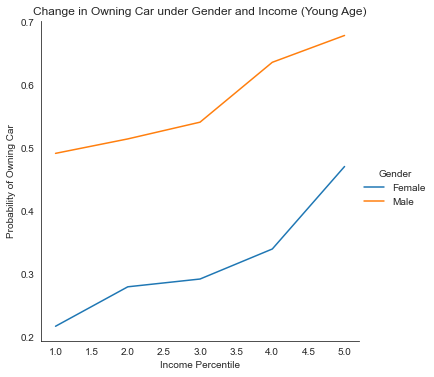

In [13]:
data_young = data_ID[data_ID['age_group']<=30]
df = data_young.groupby(['income_group5', 'Gender'])['car'].mean()
# print(df)

sns.relplot(data = df, x = 'income_group5', y = df.values, hue = 'Gender', kind = 'line')
plt.title('Change in Owning Car under Gender and Income (Young Age)')
plt.xlabel('Income Percentile')
plt.ylabel('Probability of Owning Car')
plt.show()

# 과소비 여부에 따른 소득형태 분포의 차이

##### 슬라이드 22

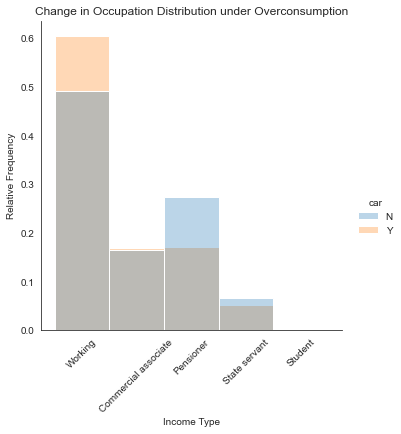

In [14]:
sns.displot(data_a, x = 'income_type', hue = 'car', stat='probability', common_norm=False, bins = 10, alpha = 0.3)
plt.title('Change in Occupation Distribution under Overconsumption')
plt.xlabel('Income Type')
plt.ylabel('Relative Frequency')
plt.xticks(rotation = 45)
plt.show()

# 과소비 여부에 따른 교육 수준 분포의 차이

##### 슬라이드 22

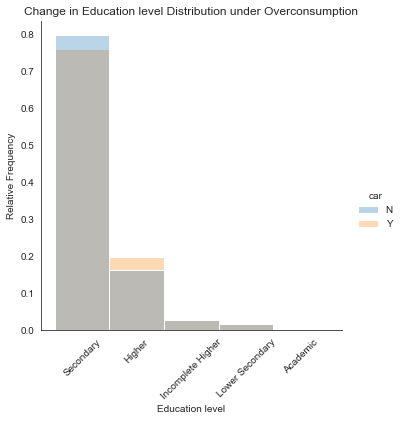

In [17]:
sns.displot(data_a, x = 'edu_type', hue = 'car', stat='probability', common_norm=False, bins = 10, alpha = 0.3)
plt.title('Change in Education level Distribution under Overconsumption')
plt.xlabel('Education level')
plt.ylabel('Relative Frequency')
plt.xticks(rotation = 45)
plt.xticks([0,1,2,3,4],['Secondary','Higher','Incomplete Higher','Lower Secondary','Academic'])
plt.show()